In [1]:
import sklearn
import sklearn.datasets
import sklearn.ensemble
import numpy as np
import lime
import lime.lime_tabular
import anchor.anchor_tabular
from __future__ import print_function

In [2]:
import pandas as pd
data = pd.read_csv('new.csv')
header = list(data.columns)[1:]

FileNotFoundError: File b'new.csv' does not exist

In [242]:
data = data.fillna(0.0)

In [243]:
for i in range(4):
    data = pd.concat([data,data])

In [244]:
data

t  1_CodeGenerator_compilationTime_count  \
0   1528982655                                   -1.0   
1   1528982656                                   -1.0   
2   1528982657                                   -1.0   
3   1528982658                                    0.0   
4   1528982659                                    0.0   
5   1528982660                                    0.0   
6   1528982661                                    0.0   
7   1528982662                                    0.0   
8   1528982663                                    0.0   
0   1528982655                                   -1.0   
1   1528982656                                   -1.0   
2   1528982657                                   -1.0   
3   1528982658                                    0.0   
4   1528982659                                    0.0   
5   1528982660                                    0.0   
6   1528982661                                    0.0   
7   1528982662                                    0.0   
8   1528982663                                    0.0   
0   1528982655                                   -1.0   
1   1528982656                                   -1.0   
2   1528982657                                   -1.0   
3   1528982658                                    0.0   
4   1528982659                                    0.0   
5   1528982660                                    0.0   
6   1528982661                                    0.0   
7   1528982662                                    0.0   
8   1528982663                                    0.0   
0   1528982655                                   -1.0   
1   1528982656                                   -1.0   
2   1528982657                                   -1.0   
..         ...                                    ...   
6   1528982661                                    0.0   
7   1528982662                                    0.0   
8   1528982663                                    0.0   
0   1528982655                                   -1.0   
1   1528982656                                   -1.0   
2   1528982657                                   -1.0   
3   1528982658                                    0.0   
4   1528982659                                    0.0   
5   1528982660                                    0.0   
6   1528982661                                    0.0   
7   1528982662                                    0.0   
8   1528982663                                    0.0   
0   1528982655                                   -1.0   
1   1528982656                                   -1.0   
2   1528982657                                   -1.0   
3   1528982658                                    0.0   
4   1528982659                                    0.0   
5   1528982660                                    0.0   
6   1528982661                                    0.0   
7   1528982662                                    0.0   
8   1528982663                                    0.0   
0   1528982655                                   -1.0   
1   1528982656                                   -1.0   
2   1528982657                                   -1.0   
3   1528982658                                    0.0   
4   1528982659                                    0.0   
5   1528982660                                    0.0   
6   1528982661                                    0.0   
7   1528982662                                    0.0   
8   1528982663                                    0.0   

    1_CodeGenerator_compilationTime_max  1_CodeGenerator_compilationTime_mean  \
0                                  -1.0                                  -1.0   
1                                  -1.0                                  -1.0   
2                                  -1.0                                  -1.0   
3                                   0.0                                   0.0   
4                                   0.0                                  

In [171]:
label = [0] * len(data)
for i in range(len(data)):
    if i < len(data)//3:
        data.iloc[i, 1] = 0. + np.random.randn() * 0.1
        label[i] = 0
    else:
        data.iloc[i, 1] = 1. + np.random.randn() * 0.1
        label[i] = 1

In [172]:
data

t  1_CodeGenerator_compilationTime_count  \
0   1528982655                              -0.005752   
1   1528982656                               0.060139   
2   1528982657                               0.189426   
3   1528982658                               0.072787   
4   1528982659                               0.307117   
5   1528982660                              -0.052818   
6   1528982661                              -0.139899   
7   1528982662                               0.050927   
8   1528982663                               0.063256   
0   1528982655                              -0.019686   
1   1528982656                               0.035823   
2   1528982657                              -0.200963   
3   1528982658                               0.121888   
4   1528982659                              -0.016492   
5   1528982660                              -0.050336   
6   1528982661                              -0.007271   
7   1528982662                              -0.032251   
8   1528982663                              -0.043197   
0   1528982655                               0.051872   
1   1528982656                              -0.057084   
2   1528982657                              -0.113328   
3   1528982658                               0.129461   
4   1528982659                               0.247967   
5   1528982660                              -0.082396   
6   1528982661                              -0.116784   
7   1528982662                               0.112093   
8   1528982663                               0.104720   
0   1528982655                               0.168698   
1   1528982656                              -0.101295   
2   1528982657                              -0.145381   
..         ...                                    ...   
6   1528982661                               0.957745   
7   1528982662                               0.946437   
8   1528982663                               1.086762   
0   1528982655                               1.006547   
1   1528982656                               1.162789   
2   1528982657                               0.989395   
3   1528982658                               0.970654   
4   1528982659                               1.000249   
5   1528982660                               1.197152   
6   1528982661                               0.925574   
7   1528982662                               1.117791   
8   1528982663                               1.041843   
0   1528982655                               0.859216   
1   1528982656                               1.038293   
2   1528982657                               0.942816   
3   1528982658                               0.892985   
4   1528982659                               0.986389   
5   1528982660                               0.986567   
6   1528982661                               0.912333   
7   1528982662                               1.110120   
8   1528982663                               1.079030   
0   1528982655                               0.952427   
1   1528982656                               0.868674   
2   1528982657                               1.005843   
3   1528982658                               0.987661   
4   1528982659                               0.966668   
5   1528982660                               1.146852   
6   1528982661                               0.938257   
7   1528982662                               0.857640   
8   1528982663                               1.179761   

    1_CodeGenerator_compilationTime_max  1_CodeGenerator_compilationTime_mean  \
0                                  -1.0                                  -1.0   
1                                  -1.0                                  -1.0   
2                                  -1.0                                  -1.0   
3                                   0.0                                   0.0   
4                                   0.0                                  

In [15]:
header

['t',
 '1_CodeGenerator_compilationTime_count',
 '1_CodeGenerator_compilationTime_max',
 '1_CodeGenerator_compilationTime_mean',
 '1_CodeGenerator_compilationTime_min',
 '1_CodeGenerator_compilationTime_p50',
 '1_CodeGenerator_compilationTime_p75',
 '1_CodeGenerator_compilationTime_p95',
 '1_CodeGenerator_compilationTime_p98',
 '1_CodeGenerator_compilationTime_p99',
 '1_CodeGenerator_compilationTime_p999',
 '1_CodeGenerator_compilationTime_stddev',
 '1_CodeGenerator_generatedClassSize_count',
 '1_CodeGenerator_generatedClassSize_max',
 '1_CodeGenerator_generatedClassSize_mean',
 '1_CodeGenerator_generatedClassSize_min',
 '1_CodeGenerator_generatedClassSize_p50',
 '1_CodeGenerator_generatedClassSize_p75',
 '1_CodeGenerator_generatedClassSize_p95',
 '1_CodeGenerator_generatedClassSize_p98',
 '1_CodeGenerator_generatedClassSize_p99',
 '1_CodeGenerator_generatedClassSize_p999',
 '1_CodeGenerator_generatedClassSize_stddev',
 '1_CodeGenerator_generatedMethodSize_count',
 '1_CodeGenerator_gen

In [173]:
train, test, labels_train, labels_test = sklearn.model_selection.train_test_split(data.values[:, 1:], label, train_size=0.80, shuffle=True)

/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [174]:
%%time
from xgboost import XGBClassifier
from sklearn import model_selection
from sklearn.metrics import accuracy_score, f1_score

nj= 4 ; ne= 4 ; md= 1 ; e= 0.1
xgb = XGBClassifier(n_jobs=nj,
                    n_estimators=ne,
                    max_depth=md,
                    eta=e,
                    seed=2018)
xgb.fit(train, labels_train)

CPU times: user 63.3 ms, sys: 4.47 ms, total: 67.8 ms
Wall time: 69.9 ms


In [175]:
explainer = lime.lime_tabular.LimeTabularExplainer(train, feature_names=header, class_names=['normal', 'anormal'], discretize_continuous=True)

In [176]:
i = np.random.randint(0, test.shape[0])
exp = explainer.explain_instance(test[i], xgb.predict_proba, num_features=3, top_labels=1)

In [177]:
exp.show_in_notebook(show_table=True, show_all=False)

In [204]:
label = [0] * len(data)
for i in range(len(data)):
    if i < len(data)//3:
        data.iloc[i, 1] = 0. + np.random.randn() * 0.1
        data.iloc[i, -1] = 0. + np.random.randn() * 0.1
        label[i] = 0
    else:
        data.iloc[i, 1] = 0.2 + np.random.randn() * 0.1
        data.iloc[i, -1] = 0.2 + np.random.randn() * 0.1
        label[i] = 1

Text(0,0.5,'node8_VM_slabs_scanned')

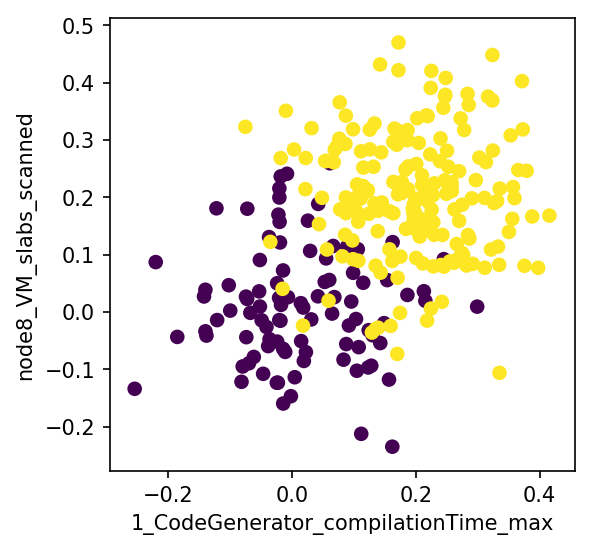

In [205]:
import matplotlib.pyplot as plt
fig1 = plt.figure(num=None, figsize=(4, 4), dpi=150, facecolor='w', edgecolor='b')
ax1 = fig1.add_subplot(111)
ax1.scatter(data.iloc[:, 1],data.iloc[:, -1], c=label)
ax1.set_xlabel(header[1])
ax1.set_ylabel(header[-1])

In [206]:
train, test, labels_train, labels_test = sklearn.model_selection.train_test_split(data.values[:, 1:], label, train_size=0.80, shuffle=True)

nj= 4 ; ne= 4 ; md= 2 ; e= 0.1
xgb = XGBClassifier(n_jobs=nj,
                    n_estimators=ne,
                    max_depth=md,
                    eta=e,
                    seed=2018)
xgb.fit(train, labels_train)


/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, eta=0.1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=2, min_child_weight=1, missing=None,
       n_estimators=4, n_jobs=4, nthread=None, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=2018, silent=True, subsample=1)

In [207]:
f1_score(xgb.predict(test), labels_test)

/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.8292682926829269

In [210]:
explainer = lime.lime_tabular.LimeTabularExplainer(train, feature_names=header, class_names=['normal', 'anormal'], discretize_continuous=True)
i = np.random.randint(0, test.shape[0])
exp = explainer.explain_instance(test[i], xgb.predict_proba, num_features=3, top_labels=1)
exp.show_in_notebook(show_table=True, show_all=False)

Text(0,0.5,'node8_VM_slabs_scanned')

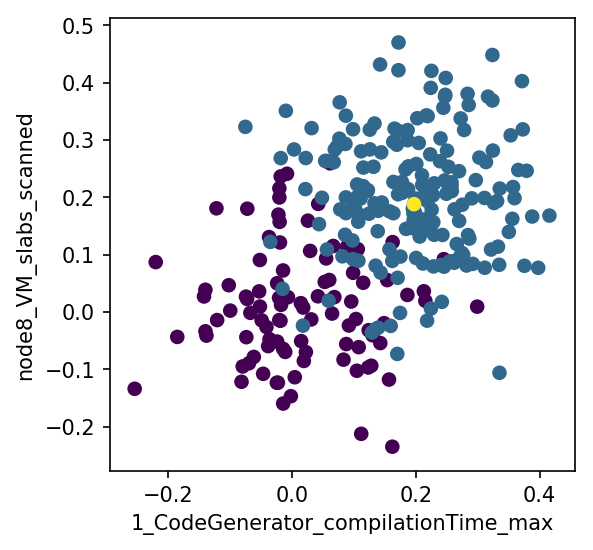

In [211]:
fig1 = plt.figure(num=None, figsize=(4, 4), dpi=150, facecolor='w', edgecolor='b')
ax1 = fig1.add_subplot(111)
ax1.scatter(list(data.iloc[:, 1]) + [test[i][0]],list(data.iloc[:, -1])+[test[i][-1]], c=label+[3])
ax1.set_xlabel(header[1])
ax1.set_ylabel(header[-1])

In [213]:
label = [0] * len(data)
for i in range(len(data)):
    if i < len(data)//3:
        data.iloc[i, 1] = 0. + np.random.randn() * 0.1
        data.iloc[i, 2] = 0. + np.random.randn() * 0.1
        data.iloc[i, -1] = 0. + np.random.randn() * 0.1
        label[i] = 0
    else:
        data.iloc[i, 1] = 0.2 + np.random.randn() * 0.1
        data.iloc[i, 2] = 0.5 + np.random.randn() * 0.1
        data.iloc[i, -1] = 0.2 + np.random.randn() * 0.1
        label[i] = 1

Text(0.5,0,'node8_VM_slabs_scanned')

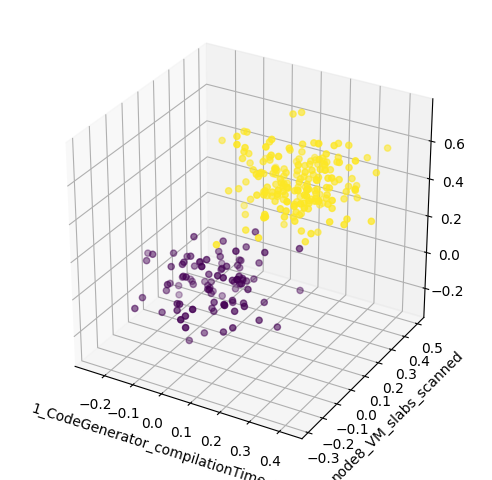

In [236]:
from mpl_toolkits.mplot3d import Axes3D
fig1 = plt.figure(num=None, figsize=(6, 6), dpi=100, facecolor='w', edgecolor='b')
ax1 = fig1.add_subplot(111, projection='3d')
ax1.scatter(data.iloc[:, 1],data.iloc[:, -1], data.iloc[:, 2], c=label)
ax1.set_xlabel(header[1])
ax1.set_ylabel(header[-1])

In [225]:
train, test, labels_train, labels_test = sklearn.model_selection.train_test_split(data.values[:, 1:], label, train_size=0.80, shuffle=True)

nj= 4 ; ne= 4 ; md= 2 ; e= 0.1
xgb = XGBClassifier(n_jobs=nj,
                    n_estimators=ne,
                    max_depth=md,
                    eta=e,
                    seed=2018)
xgb.fit(train, labels_train)
f1_score(xgb.predict(test), labels_test)

/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


1.0

In [226]:
explainer = lime.lime_tabular.LimeTabularExplainer(train, feature_names=header, class_names=['normal', 'anormal'], discretize_continuous=True)
i = np.random.randint(0, test.shape[0])
exp = explainer.explain_instance(test[i], xgb.predict_proba, num_features=3, top_labels=1)
exp.show_in_notebook(show_table=True, show_all=False)

Text(0.5,0,'1_CodeGenerator_compilationTime_mean')

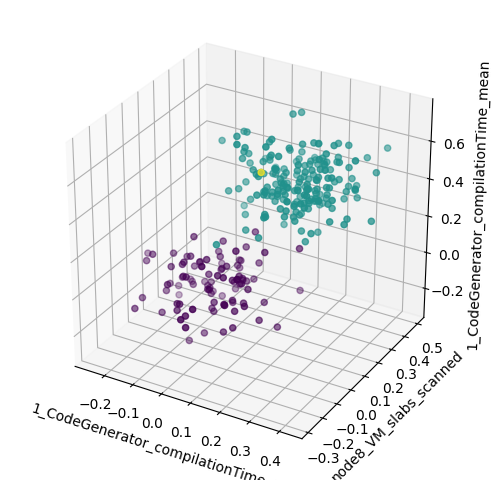

In [239]:
fig1 = plt.figure(num=None, figsize=(6, 6), dpi=100, facecolor='w', edgecolor='b')
ax1 = fig1.add_subplot(111, projection='3d')
ax1.scatter(list(data.iloc[:, 1]) + [test[i][0]],list(data.iloc[:, -1])+[test[i][-1]], list(data.iloc[:, 2])+[test[i][1]], c=label+[2])
ax1.set_xlabel(header[1])
ax1.set_ylabel(header[-1])
ax1.set_zlabel(header[2])